In [1]:
# importing the essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('lending_club_loan_two.csv')

# Section 1. EDA

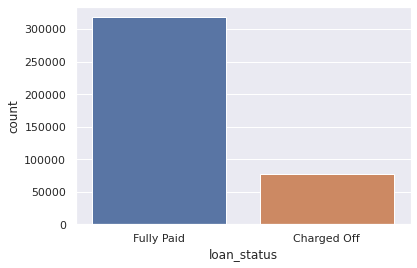

In [3]:
# Balancing of the target
sns.countplot(x='loan_status',data=df);
# quite imbalanced dataset - due to the nature of the problem - most of the loan are usually paid

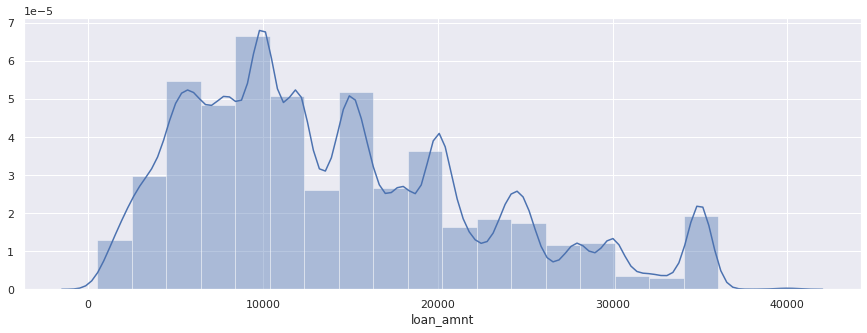

In [4]:
# distribution of loan amounts
plt.figure(figsize=(15,5))
sns.distplot(df['loan_amnt'],bins=20);
# spikes - standard loan amounts (10k, 20k, 35k)

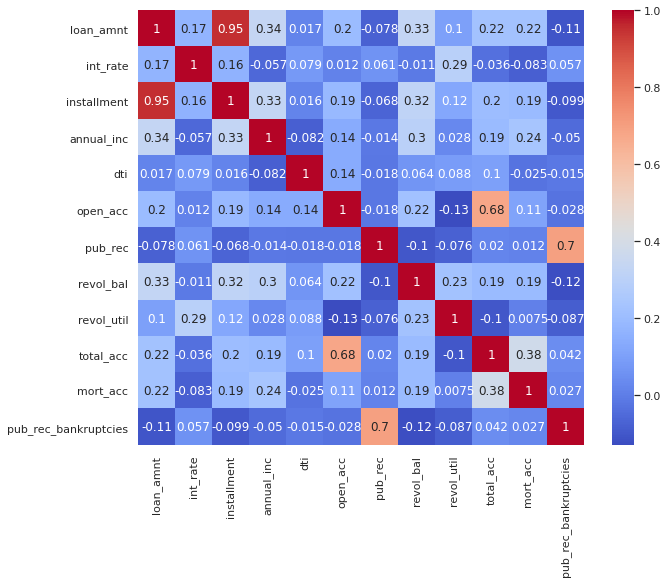

In [5]:
# correlation matrix of the features
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm');

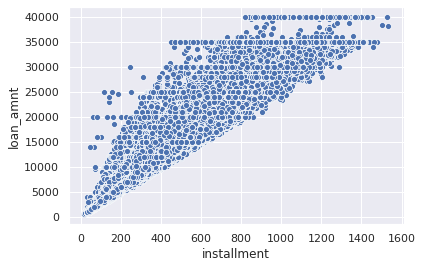

In [6]:
# further analysis on installment and loan_amnt
sns.scatterplot(x='installment',y='loan_amnt',data=df)

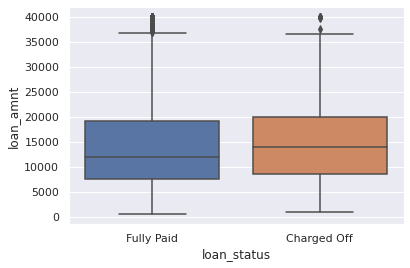

In [7]:
# loan amounts distributions by loan status
sns.boxplot(x='loan_status',y='loan_amnt',data=df);

In [8]:
# further analysis of loan amounts per loan status
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


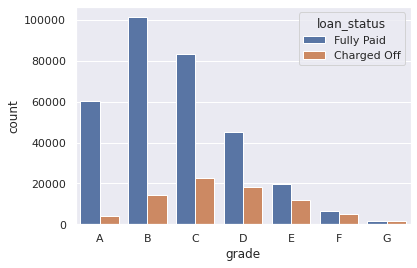

In [9]:
# loan status by grade
sns.countplot(x='grade',data=df.sort_values(by='grade',ascending=True),hue='loan_status');

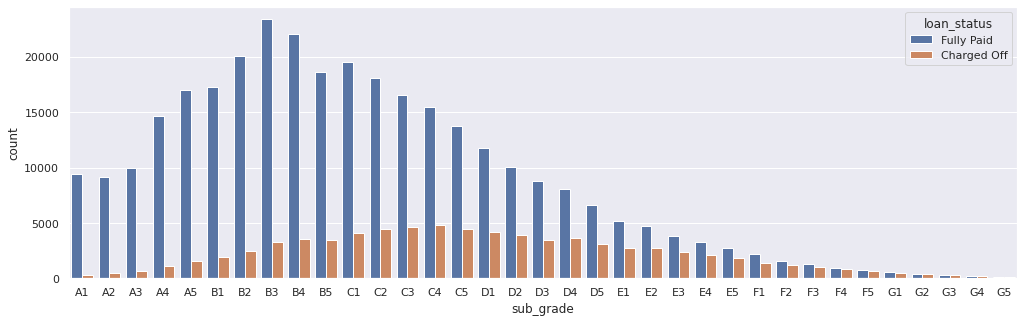

In [10]:
# loan status by subgrade
plt.figure(figsize=(17,5))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',hue='loan_status',data=df,order=subgrade_order);

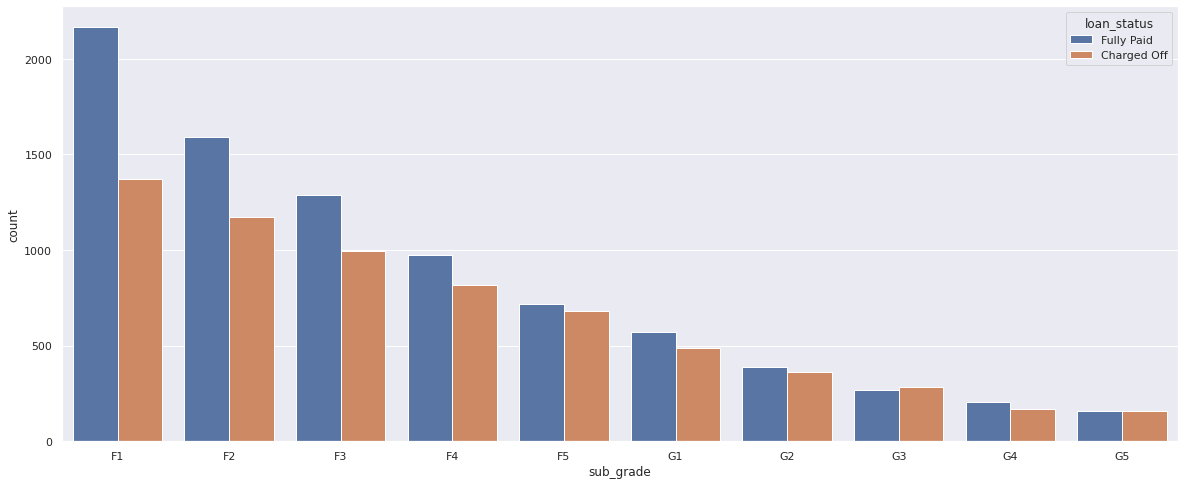

In [11]:
# checking the lowest subgrades F and G

f_and_g = df[(df['grade']=='F')|(df['grade']=='G')]

plt.figure(figsize=(20,8))
subgrade_order = sorted(f_and_g['sub_grade'].unique())
sns.countplot(x='sub_grade',hue='loan_status',data=f_and_g,order=subgrade_order);

In [12]:
# transforming the target into a binary variable
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

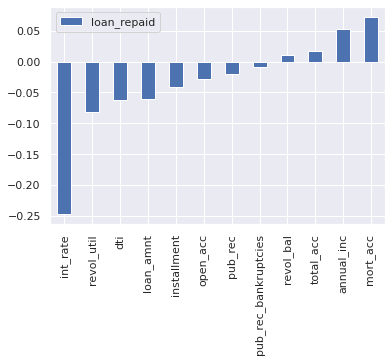

In [13]:
# analysing correlations with the target variable
df.corr()[['loan_repaid']].sort_values(by='loan_repaid').drop('loan_repaid',axis=0).plot(kind='bar');

# Section 2. Data Preprocessing 

## Missing data

In [14]:
len(df)

396030

In [15]:
#missing values per variable
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [16]:
#missing values per variable in percent
df.isnull().sum() / len(df) * 100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [17]:
# emp_title - number of unique values:
df['emp_title'].nunique()

173105

In [18]:
# top titles
df['emp_title'].value_counts()

Teacher                                  4389
Manager                                  4250
Registered Nurse                         1856
RN                                       1846
Supervisor                               1830
Sales                                    1638
Project Manager                          1505
Owner                                    1410
Driver                                   1339
Office Manager                           1218
manager                                  1145
Director                                 1089
General Manager                          1074
Engineer                                  995
teacher                                   962
driver                                    882
Vice President                            857
Operations Manager                        763
Administrative Assistant                  756
Accountant                                748
President                                 742
owner                             

In [19]:
# too many titles, for feature engineering too many assumption are needed
# Decision: drop variable emp_title
df.drop('emp_title',axis=1,inplace=True)

In [20]:
# emp_length analysis
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

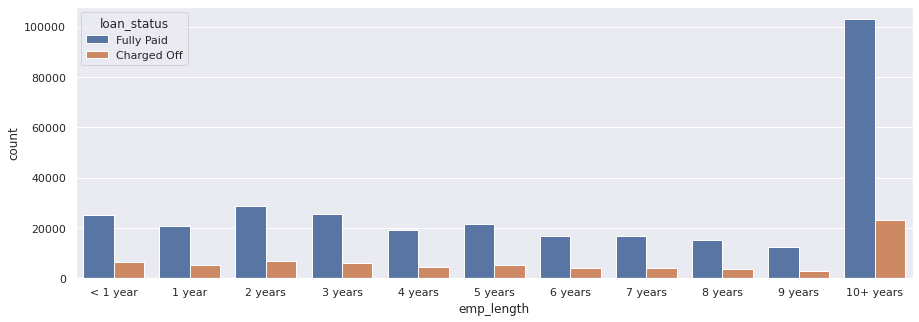

In [21]:
plt.figure(figsize=(15,5))
emp_len_order = ['< 1 year','1 year','2 years', '3 years','4 years','5 years','6 years','7 years','8 years','9 years','10+ years']
sns.countplot(x='emp_length',hue='loan_status',data=df,order=emp_len_order,);

In [22]:
#percent of charged off loans per emp_length category
df.groupby(['emp_length','loan_status']).count()[['int_rate']].loc(axis=0)[:, 'Charged Off'] / df.groupby(['emp_length']).count()[['int_rate']]

,,int_rate
emp_length,loan_status,
1 year,Charged Off,0.199135
10+ years,Charged Off,0.184186
2 years,Charged Off,0.193262
3 years,Charged Off,0.195231
4 years,Charged Off,0.192385
5 years,Charged Off,0.192187
6 years,Charged Off,0.189194
7 years,Charged Off,0.194774
8 years,Charged Off,0.199760


In [23]:
# percentages of charged off loans are very similar across all emp_length categories
# Decision: drop variable emp_length
df.drop('emp_length',axis=1,inplace=True)

In [24]:
# checking if title and purpose essentially provide the same information
df[['title','purpose']].sample(10)

,title,purpose
287392,Debt Consolidation,debt_consolidation
268803,Debt consolidation,debt_consolidation
360835,Debt consolidation,debt_consolidation
246711,Home improvement,home_improvement
347099,AllCreditsCards,debt_consolidation
350102,Credit card refinancing,credit_card
38809,Stewardship,other
158518,Debt consolidation,debt_consolidation
101810,Debt consolidation,debt_consolidation
362608,CC Consolidation,debt_consolidation


In [25]:
# purpose variable provides a good classification of the loans, therefore title variable is redundant
# Decision: drop variable title
df.drop('title',axis=1,inplace=True)

In [26]:
#mort_acc analysis
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

In [27]:
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [28]:
# total_acc seems to be a good proxy for mort_acc feature
# we can try to fill in the missing mort_acc data using the avalaible total_acc values
# I group the data by total_acc and pool the average mort_acc value, later I use that value as a 
# lookup for the missing mort_acc value 
mort_avg_total = df.groupby('total_acc').mean()['mort_acc']

In [29]:
def mort_fill(x):
    total_acc = x[0]
    mort_acc = x[1]
    if pd.isnull(mort_acc):
        return mort_avg_total[total_acc]
    else:
        return mort_acc

In [30]:
df['mort_acc'] = df[['total_acc','mort_acc']].apply(mort_fill,axis=1)

In [31]:
# checking if any missing data points are left
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [32]:
# revol_util and pub_rec_bankruptcies constitute a very small percent of the data length, so we can drop the rows with
# missing data points for those features
df.dropna(inplace=True)

In [33]:
# checking if any missing data points are left
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

## Categorical Data

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 25 columns):
loan_amnt               395219 non-null float64
term                    395219 non-null object
int_rate                395219 non-null float64
installment             395219 non-null float64
grade                   395219 non-null object
sub_grade               395219 non-null object
home_ownership          395219 non-null object
annual_inc              395219 non-null float64
verification_status     395219 non-null object
issue_d                 395219 non-null object
loan_status             395219 non-null object
purpose                 395219 non-null object
dti                     395219 non-null float64
earliest_cr_line        395219 non-null object
open_acc                395219 non-null float64
pub_rec                 395219 non-null float64
revol_bal               395219 non-null float64
revol_util              395219 non-null float64
total_acc               395219 non

In [35]:
# there 12 categorical variables in the data set
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

### term feature

In [36]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [37]:
# it's essentially a binary variable
# I keep the numbers to reflect the difference in periods
df['term'] = df['term'].apply(lambda term: int(term[:3]))

In [38]:
df['term'].value_counts()

36    301247
60     93972
Name: term, dtype: int64

### grade and sub_grade features

grade is a part of the sub_grade feature. Since it does not bring any new information, we can drop it. 

In [39]:
df.drop('grade',axis=1,inplace=True)

In [40]:
# converting sub_grade into dummy variables, dropping first dummies to avoid duplicating information
sub_grade_dummies = pd.get_dummies(df['sub_grade'],drop_first=True)
df = pd.concat([df.drop('sub_grade',axis=1),sub_grade_dummies],axis=1)

In [41]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

### verification_status, purpose, initial_list_status, application_type features

In [42]:
df['verification_status'].value_counts()

Verified           139451
Source Verified    131301
Not Verified       124467
Name: verification_status, dtype: int64

In [43]:
df['purpose'].value_counts()

debt_consolidation    234169
credit_card            82923
home_improvement       23961
other                  21059
major_purchase          8756
small_business          5656
car                     4670
medical                 4175
moving                  2842
vacation                2442
house                   2197
wedding                 1794
renewable_energy         329
educational              246
Name: purpose, dtype: int64

In [44]:
df['initial_list_status'].value_counts()

f    237346
w    157873
Name: initial_list_status, dtype: int64

In [45]:
df['application_type'].value_counts()

INDIVIDUAL    394508
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64

All these features all suitable for one hot encoding:

In [46]:
verification_status_dummies = pd.get_dummies(df['verification_status'],drop_first=True)
df = pd.concat([df.drop('verification_status',axis=1),verification_status_dummies],axis=1)

In [ ]:
purpose_dummies = pd.get_dummies(df['purpose'],drop_first=True)
df = pd.concat([df.drop('purpose',axis=1),purpose_dummies],axis=1)

In [ ]:
initial_list_status_dummies = pd.get_dummies(df['initial_list_status'],drop_first=True)
df = pd.concat([df.drop('initial_list_status',axis=1),initial_list_status_dummies],axis=1)

In [ ]:
application_type_dummies = pd.get_dummies(df['application_type'],drop_first=True)
df = pd.concat([df.drop('application_type',axis=1),application_type_dummies],axis=1)

In [ ]:
df.columns

### home_ownership feature 

In [ ]:
df['home_ownership'].value_counts()

In [ ]:
# Replacing NONE and ANY to OTHER, as they are very rare
df['home_ownership'] = df['home_ownership'].replace(['NONE','ANY'],'OTHER')

In [ ]:
df['home_ownership'].value_counts()

In [ ]:
# Ready to be one hot encoded
home_ownership_dummies = pd.get_dummies(df['home_ownership'],drop_first=True)
df = pd.concat([df.drop('home_ownership',axis=1),home_ownership_dummies],axis=1)

### address feature

In [ ]:
df['address'].sample(15)

In [ ]:
# Extracting zip code out of the address
df['zip_code'] = df['address'].apply(lambda address: address.split(' ')[-1])

In [ ]:
df['zip_code'].value_counts()

In [ ]:
# zip_code is ready to be one hot encoded
zip_code_dummies = pd.get_dummies(df['zip_code'],drop_first=True)
df = pd.concat([df.drop('zip_code',axis=1),zip_code_dummies],axis=1)

In [ ]:
# dropping the address feature
df.drop('address',axis=1,inplace=True)

### issue_d feature

This feature is not going to be known at the point of loan issuance. Therefore, this is no point of keeping it in the model.

In [ ]:
df.drop('issue_d',axis=1,inplace=True)

### earliest_cr_line feature

In [ ]:
df['earliest_cr_line'].sample(10)

In [ ]:
# Extracting year from the datapoints
df['cr_line_year'] = df['earliest_cr_line'].apply(lambda date: int(date.split('-')[-1]))

In [ ]:
# dropping the earliest_cr_line feature
df.drop('earliest_cr_line',axis=1,inplace=True)

In [ ]:
df.columns

## Preprocessing

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# dropping loan_status column, since there is a loan_repaid column already encoded
df.drop('loan_status',axis=1,inplace=True)

In [ ]:
# grabbing a sample for training time, due low capacity of the computer
df = df.sample(frac=0.1,random_state=101)

In [ ]:
# setting X and y variables to the values of the features and label
X = df.drop('loan_repaid', axis=1).values
y = df['loan_repaid'].values

In [ ]:
print(len(df))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## Normalizing the Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
# normalizing the data through MinMaxScaler on X_train data only to prevent leakage of the data from X_test
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Section 3. Creating and Evaluating the Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
X_train.shape

In [ ]:
# I've decided to add two hidden layers to the model, and some dropoutlayers to avoid overfitting

model = Sequential()

model.add(Dense(78, activation='relu')) #78 is the number of features we have in X_train
model.add(Dropout(0.2))

model.add(Dense(78, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(78, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [ ]:
model.fit(x=X_train,y=y_train,epochs=25,batch_size=128,validation_data=(X_test,y_test))

## Evaluation

In [ ]:
#grabbing the train and validation losses from the model
losses = pd.DataFrame(model.history.history)

In [ ]:
losses.head(10)

In [ ]:
losses.plot()

In [ ]:
# We can see that approximately after the 9th epoch, the validation loss starts to decrease - so the overfitting begins

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

In [ ]:
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

In [ ]:
# let's compare the accuracy to the "default guess"
df['loan_repaid'].value_counts()

In [ ]:
31664/len(df)

In [ ]:
# the accuracy of the model is higher than the "default guess" score, which is a good indicator

Checking a "random customer" against the model

In [ ]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

In [ ]:
#scaling and reshaping the data to feed into the model
new_customer = scaler.transform(new_customer.values.reshape(1,78))

In [ ]:
new_customer

In [ ]:
# model prediction
(model.predict(new_customer) > 0.5).astype("int32")

In [ ]:
# let's check if the loan was actually repaid
df['loan_repaid'].iloc[random_ind]

The loan was repaid, and the model predicted so as well. Yay!